# "My ridiculous dog is amazing." [sentiment: positive]

With all of the tweets circulating every second it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone. Capturing sentiment in language is important in these times where decisions and reactions are created and updated in seconds. But, which words actually lead to the sentiment description? In this competition you will need to pick out the part of the tweet (word or phrase) that reflects the sentiment.

Help build your skills in this important area with this broad dataset of tweets. Work on your technique to grab a top spot in this competition. What words in tweets support a positive, negative, or neutral sentiment? How can you help make that determination using machine learning tools?

In this competition we've extracted support phrases from Figure Eight's Data for Everyone platform. The dataset is titled Sentiment Analysis: Emotion in Text tweets with existing sentiment labels, used here under creative commons attribution 4.0. international licence. Your objective in this competition is to construct a model that can do the same - look at the labeled sentiment for a given tweet and figure out what word or phrase best supports it.

Disclaimer: The dataset for this competition contains text that may be considered profane, vulgar, or offensive.


https://www.kaggle.com/c/tweet-sentiment-extraction

## Import from Libraries

In [1]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

## Uploading files

In [2]:
data = pd.read_csv('../input/tweet-sentiment-extraction/train.csv')
data_test = pd.read_csv('../input/tweet-sentiment-extraction/test.csv')

In [3]:
data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
data_test

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [5]:
data.drop(['textID'], axis = 1, inplace=True)
data_test.drop(['textID'], axis = 1, inplace=True)

In [6]:
data.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
data_test.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


## Analyzing

In [8]:
data.isnull().sum(axis=0)

text             1
selected_text    1
sentiment        0
dtype: int64

In [9]:
data_test.isnull().sum(axis=0)

text         0
sentiment    0
dtype: int64

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data['sentiment'] = data['sentiment'].map({'positive': 1,
                             'negative': -1,
                             'neutral': 0},
                             na_action=None)

In [12]:
data_test['sentiment'] = data['sentiment'].map({'positive': 1,
                             'negative': -1,
                             'neutral': 0},
                             na_action=None)

In [13]:
positive = data[data['sentiment'] == 1]
negative = data[data['sentiment'] == -1]
neutral = data[data['sentiment'] == 0]
positive_test = data_test[data_test['sentiment'] == 1]
negative_test = data_test[data_test['sentiment'] == -1]
neutral_test = data_test[data_test['sentiment'] == 0]

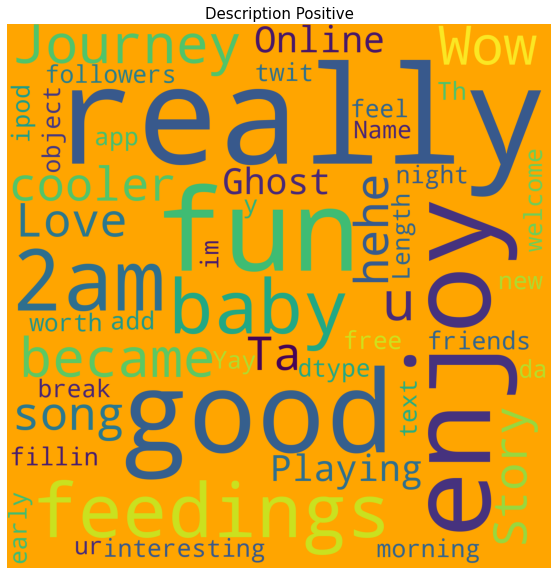

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['text']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

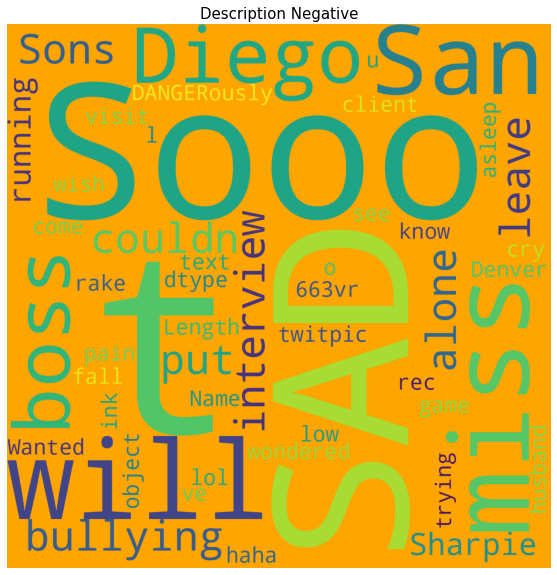

In [15]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['text']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

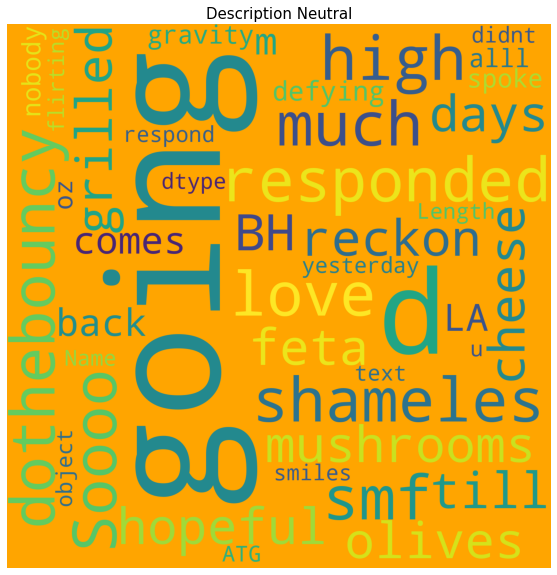

In [16]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(neutral['text']))
plt.title('Description Neutral', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [17]:
fig2 = px.histogram(data,x='sentiment',color='sentiment',template='plotly_dark')
fig2.show()

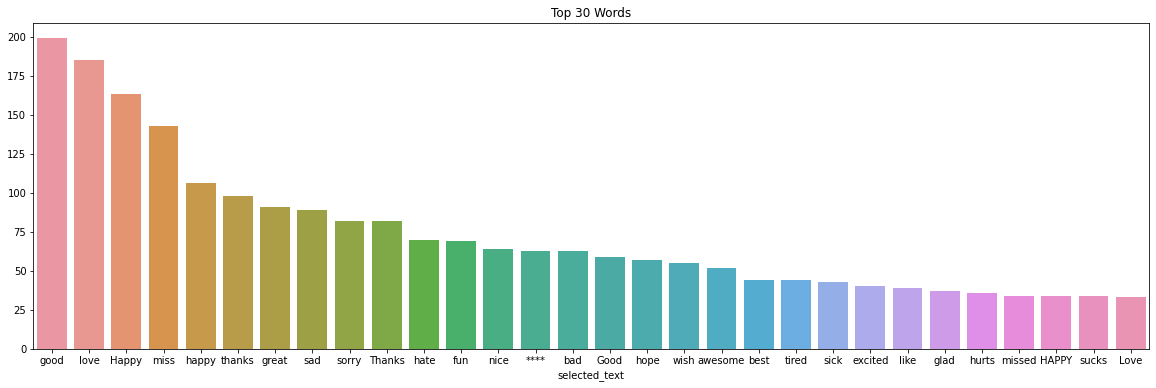

In [18]:
plt.figure(figsize=(20,6))
top_30 = data.groupby('selected_text')['selected_text'].count() \
.sort_values(ascending = False).head(30)
sns.barplot(x=top_30.index, y = top_30.values)
plt.title('Top 30 Words')
plt.show()

In [19]:
temp = data.describe()
temp.style.background_gradient(cmap='Purples')

,sentiment
count,27480.000000
mean,0.029148
std,0.771118
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


In [20]:
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x >= 0 else 0)

In [21]:
X = data.iloc[:, 0].values
X

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype=object)

In [22]:
X.shape

(27480,)

In [23]:
y = data.iloc[:, 2].values
y

array([1, 0, 0, ..., 1, 1, 1])

In [24]:
X, _, y, _ = train_test_split(X, y, stratify = y)

In [25]:
print(X.shape, y.shape )

(20610,) (20610,)


In [26]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1]), array([ 5836, 14774]))

In [27]:
def clean_t(t):
  t = BeautifulSoup(t, 'lxml').get_text()
  t = re.sub(r"@[A-Za-z0-9]+", ' ', t)
  t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t)
  t = re.sub(r"[^a-zA-Z.!?]", ' ', t)
  t = re.sub(r" +", ' ', t)
  return t

In [28]:
text = "I don't like"
text = clean_t(text)
text

'I don t like'

In [29]:
import spacy
nlp = spacy.blank("en")
nlp

In [30]:
stop_words = sp.lang.en.STOP_WORDS
print(stop_words)

{'if', 'thereafter', 'whoever', 'above', 'yet', 'noone', 'last', 'become', 'than', 'his', 'beforehand', 'and', 'except', 'how', 'at', 'per', 'though', 'moreover', 'what', 'amount', 'now', '’m', 'various', 'whereas', 'beside', 'during', 'whither', 'many', 'none', 'back', 'although', 'their', 'afterwards', 'off', 'so', 'make', 'seems', 'neither', 'themselves', 'would', 'by', 'elsewhere', 'toward', 'quite', 'had', 'hereby', 'nobody', 'whose', 'will', 'them', 'yours', 'without', 'one', 'below', 'out', 'done', 'i', 'among', 'front', 'after', 'has', 'with', 'bottom', 'herself', 'him', 'always', 'nor', 'twelve', 'they', 'under', 'this', 'really', 'every', 'anyone', 'full', 'becomes', 'do', 'anyhow', 'meanwhile', 'anywhere', 'whatever', 'forty', 'already', 'four', 'own', 'are', 'indeed', 'thence', 'sixty', 'formerly', 'such', 'hereafter', 'few', 'could', 'third', 'using', 'across', '’ve', 'against', 'we', 'he', 'put', 'as', 'yourselves', 'another', 'several', 'hence', 'becoming', 'may', 'about

In [31]:
len(stop_words)

326

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def clean_t2(tt):
  tt = tt.lower()
  document = nlp(tt)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return words

In [34]:
text2 = clean_t2(text)
text2

'don t like'

In [35]:
data_clean = [clean_t2(clean_t(t)) for t in X]

In [36]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

truly enlightening
u think fair ...... k den guess m wrng .... feel fair ....
ll worth wait m busting gut
says new layout default plurk themes yay pero dumugo ilong ko kaka tweak sa font ha
yay short stack episode recorded tuesday
meanie time lux wo nt
... feelin like blah ... hours
eh ve better m excited ryan hurley tomorrow
squashed foot
wana num fan sharsies


In [37]:
data_labels = y
data_labels

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
np.unique(data_labels)

array([0, 1])

## Tokenization

In [39]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [40]:
tokenizer.vocab_size

24639

In [41]:
print(tokenizer.subwords)

['s_', 'm_', 't_', ' ... ', '  ', 'day_', 'good_', ' .. ', 'got_', 'like_', 'going_', 'nt_', 'love_', 'happy_', 'don_', 'u_', ' ...', 'work_', 'know_', 'today_', 'new_', 'time_', 'day', 'think_', 'want_', 'll_', 'oh_', 'lol_', 'night_', 'need_', 'hope_', 'home_', 'thanks_', 'great_', ' .... ', 've_', 'miss_', 'feel_', 'wish_', 'lol', 'gon_', 'na_', 'sorry_', 'twitter_', 'morning_', 'mother_', 'haha_', 'getting_', 'yeah_', 'fun_', 'today', 'nice_', 'didn_', 'bad_', 'watching_', 'way_', 'd_', 'mothers_', 'come_', ' ..', 'work', 'tomorrow_', 'people_', 'hate_', 'tonight_', 'better_', 'sleep_', 'having_', 'right_', 'little_', 'mom_', 'hey_', 'sad_', 'bed_', 'long_', 'best_', 'week_', 'yes_', 'wait_', 'school_', 'weekend_', 'thing_', 'sure_', 'wanna_', 'ur_', 'ok_', 'thank_', 'won_', 'look_', 'feeling_', 'working_', 'time', 'good', 'night', 'days_', 'awesome_', 'let_', 'man_', 'went_', 'trying_', 'ready_', 'finally_', 'pretty_', 'looks_', 'tired_', 'looking_', 'guys_', 'n_', 'maybe_', 'frie

In [42]:
ids = tokenizer.encode('I like')
ids

[24456, 24415, 149]

In [43]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [44]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[3077, 413]
[2, 11, 74, 7542, 7542, 9744, 2043, 24498]
[56, 7590, 80, 620, 62, 1335, 1738, 3833]
[1, 54, 603]
[298, 9, 1229, 393, 4, 16957, 4, 33, 211, 177, 5476]
[33, 167, 21, 10817]
[19, 53, 3, 18, 2926, 1348, 15723, 1081, 5251]
[1440, 1434, 300, 16984, 16666, 631]
[5, 2498, 486, 484, 696]
[90, 7, 448, 52, 4913, 8985, 556, 1658]


## Padding

In [45]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

38

In [46]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [47]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

[ 752  258 5616 3724    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
[ 64  91 505 198  93   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[   10 15328     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[651   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[   63     2 23964 23724 22562  7290 24161   787     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0

## Division of database into training and testing

In [48]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [49]:
print(train_inputs.shape, train_labels.shape)

(14427, 38) (14427,)


In [50]:
print(test_inputs.shape, test_labels.shape )

(6183, 38) (6183,)


## Model building

In [51]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)
    self.embedding = layers.Embedding(vocab_size, emb_dim)
    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')
    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')
    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')
    self.pool = layers.GlobalMaxPool1D()
    
#estrutura da rede neural
    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

## Training

In [52]:
vocab_size = tokenizer.vocab_size
vocab_size

24639

In [53]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

2

In [54]:
dropout_rate = 0.2
nb_epochs = 5  

In [55]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [56]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)

2021-11-11 12:59:45.297487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
203/203 [==============================] - 16s 70ms/step - loss: 0.4936 - accuracy: 0.7711 - val_loss: 0.4377 - val_accuracy: 0.8205
Epoch 2/5
203/203 [==============================] - 14s 67ms/step - loss: 0.2471 - accuracy: 0.9010 - val_loss: 0.4799 - val_accuracy: 0.7997
Epoch 3/5
203/203 [==============================] - 13s 66ms/step - loss: 0.0770 - accuracy: 0.9743 - val_loss: 0.6618 - val_accuracy: 0.7817
Epoch 4/5
203/203 [==============================] - 14s 68ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.8052 - val_accuracy: 0.7519
Epoch 5/5
203/203 [==============================] - 14s 67ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.9911 - val_accuracy: 0.7748


## Model Evaluation

In [58]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

97/97 [==============================] - 1s 13ms/step - loss: 0.9645 - accuracy: 0.7889
[0.9645105600357056, 0.7889373898506165]


In [59]:
y_pred_test = Dcnn.predict(test_inputs)

In [60]:
y_pred_test

array([[0.9999163 ],
       [0.9999993 ],
       [0.99480844],
       ...,
       [0.99033856],
       [0.5630658 ],
       [0.16106415]], dtype=float32)

In [61]:
y_pred_test = (y_pred_test > 0.5)
y_pred_test

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [62]:
test_labels

array([1, 0, 1, ..., 1, 1, 0])

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[ 964,  787],
       [ 518, 3914]])

<AxesSubplot:>

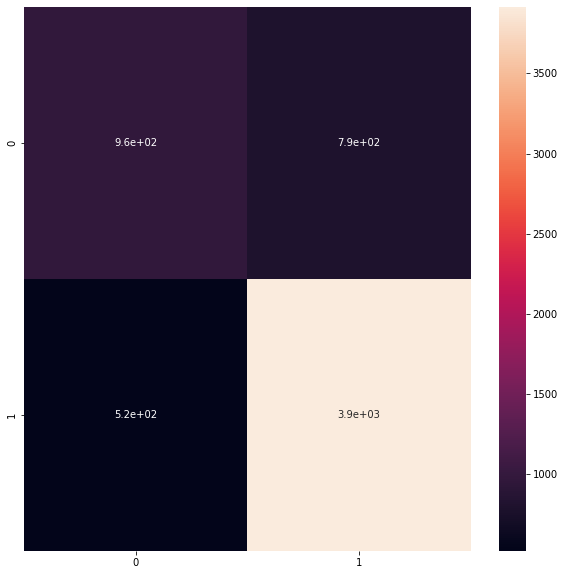

In [64]:
sns.heatmap(cm, annot=True)

In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

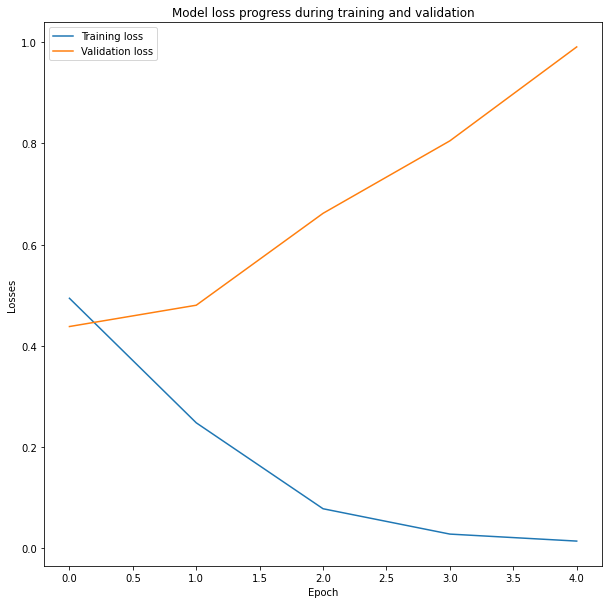

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

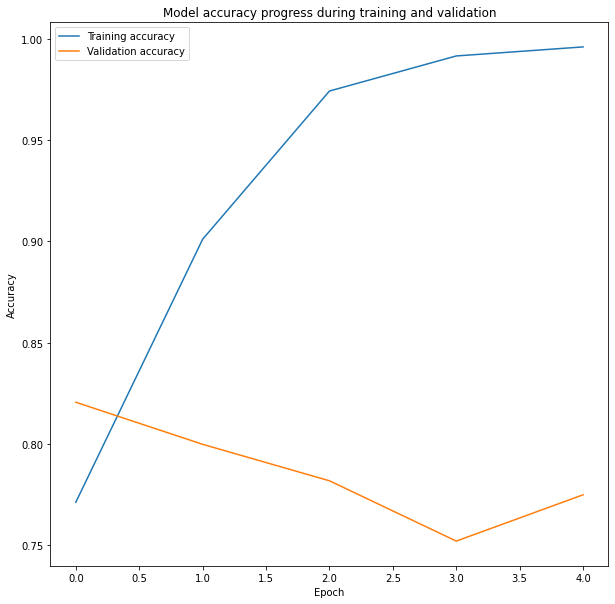

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

## Forecasts

In [68]:
text = "I hate"
text = tokenizer.encode(text)
Dcnn(np.array([text]), training=False).numpy()

array([[0.00233048]], dtype=float32)

In [69]:
text = "I happy"
text = tokenizer.encode(text)
Dcnn(np.array([text]), training=False).numpy()

array([[0.14871931]], dtype=float32)

In [70]:
text = "It is complicated"
text = tokenizer.encode(text)
Dcnn(np.array([text]), training=False).numpy()

array([[0.00339708]], dtype=float32)

In [71]:
data_test.to_csv("submission.csv", index=False)

**Here I created a small function with an algorithm, as the word is placed it will say if it is positive, neutral or negative.**

In [72]:
''''text = str(input('write here:   '))
text = tokenizer.encode(text)
text =  Dcnn(np.array([text]), training=False).numpy()
if text >= 0.7:
  print('positivo');
elif text >= 0.4 and text <= 0.69:
    print('neutral')
else:
  print('negativo')'''

"'text = str(input('write here:   '))\ntext = tokenizer.encode(text)\ntext =  Dcnn(np.array([text]), training=False).numpy()\nif text >= 0.7:\n  print('positivo');\nelif text >= 0.4 and text <= 0.69:\n    print('neutral')\nelse:\n  print('negativo')"

# Conclusion

There is a small difficulty for the algorithm to identify the negative words, as there is a balance between the neutral and positive classes, the algorithm often understands the neutral as positive, as there is no negative word for it to relate to neutrality.
Perhaps if we had a larger database for training the algorithm we could improve it with more vocabulary words, certainly the hit margin will be much better with a broader learning of the database, even so we had a great result with some adjustments to the code.